# Import and installing

In [4]:
import os
import pandas as pd  
import pydicom as dcm
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

from constants import SEED, TRAIN_DF_PATH, DETAIL_DF_PATH, TRAIN_IMAGES_PATH, TEST_IMAGES_PATH, TRAIN_SAMPLES, VALID_SAMPLES

# EDA

In [5]:
class_info_df = pd.read_csv(DETAIL_DF_PATH)
train_labels_df = pd.read_csv(TRAIN_DF_PATH)    

print(f"Detailed class info -  rows: {class_info_df.shape[0]}, columns: {class_info_df.shape[1]}")
print(f"Train labels -  rows: {train_labels_df.shape[0]}, columns: {train_labels_df.shape[1]}")

Detailed class info -  rows: 30227, columns: 2
Train labels -  rows: 30227, columns: 6


In [6]:
class_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [7]:
class_info_df.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

We have as many as three categories instead of the expected two. The third category shows that there is some opacification, but no pneumonia. There are no missing data

C:\Users\danie_eqscsl0\AppData\Local\Temp\ipykernel_18576\2038467864.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_series,
c:\Users\danie_eqscsl0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie_eqscsl0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie_

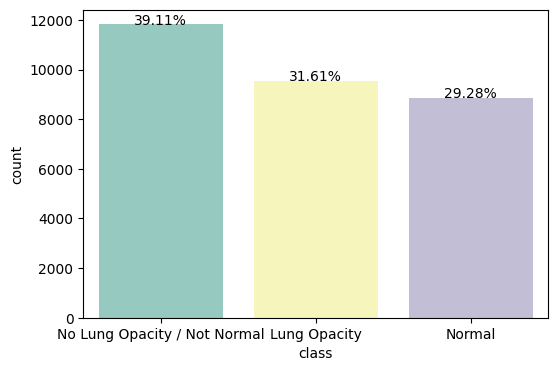

In [8]:
f, ax = plt.subplots(1, 1, figsize=(6, 4))

# Calculate the total number of observations
total = float(len(class_info_df))

# Convert 'class' column to pandas Series to ensure it's a pandas object
class_series = class_info_df['class']

# Create the count plot
sns.countplot(x=class_series,
              order=class_series.value_counts().index,  # Order based on value counts
              palette='Set3')

# Add percentage annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

# Show the plot
plt.show()

We can see that our dataset is imbalanced, so we should consider this fact during modeling.

In [9]:
#merge two dataframe to add class
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')

In [10]:
train_class_df.sample(10)

patientId      x      y  width  height  \
24711  b61d9cc8-6726-44a7-8897-c6c5c7c3ad5e  195.0  421.0  256.0   341.0   
11035  606c5b56-2dfc-4e7b-bd8a-2f18124aae0b    NaN    NaN    NaN     NaN   
8085   4afbc897-69d2-4074-9690-c3410ff4706c    NaN    NaN    NaN     NaN   
33746  f174948c-014a-422a-886e-139506a6f697    NaN    NaN    NaN     NaN   
16574  85d71d6b-cbe9-4bc8-a83c-a3d4c3d94dad    NaN    NaN    NaN     NaN   
22310  ab4e14e3-259f-4e54-8860-b2762e8374e9  114.0  431.0  222.0   218.0   
36486  1505f53a-4da5-416e-a279-66849672051c  728.0  655.0  110.0   236.0   
30243  d79e7709-3d77-4be2-9f22-a81a1999067a    NaN    NaN    NaN     NaN   
2918   29aec016-fae1-429c-b88c-58e10cd90d7b  130.0  392.0  198.0   104.0   
14685  79319bc4-8e67-469b-8b9c-5ddfb2444749  203.0  389.0  191.0   308.0   

       Target                         class  
24711       1                  Lung Opacity  
11035       0  No Lung Opacity / Not Normal  
8085        0                        Normal  
33746       0  No Lung Opacity / Not Normal  
16574       0                        Normal  
22310       1                  Lung Opacity  
36486       1                  Lung Opacity  
30243       0                        Normal  
2918        1                  Lung Opacity  
14685       1                  Lung Opacity

c:\Users\danie_eqscsl0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


c:\Users\danie_eqscsl0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\danie_eqscsl0\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


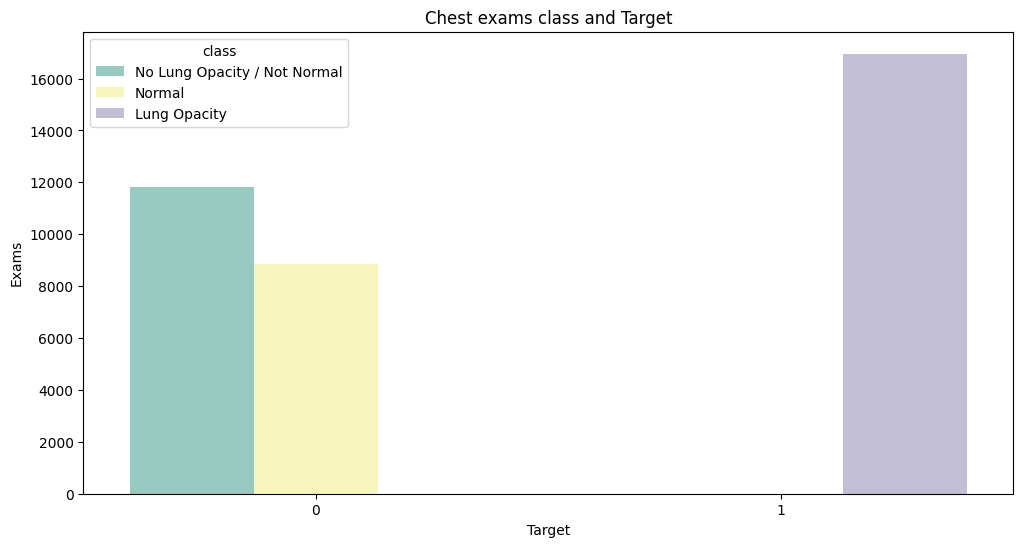

In [11]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 6))

# Group by 'Target' and 'class' columns, and count the occurrences
tmp = train_class_df.groupby('Target')['class'].value_counts()

# Convert the result to a DataFrame for easier manipulation
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()

# Create the bar plot
sns.barplot(ax=ax, x='Target', y='Exams', hue='class', data=df, palette='Set3')

# Add title
plt.title("Chest exams class and Target")

# Show the plot
plt.show()

So, number of images with opacity is smaller than without it. So perhaps we should cut dataset and try to use just positive images(or balanced).

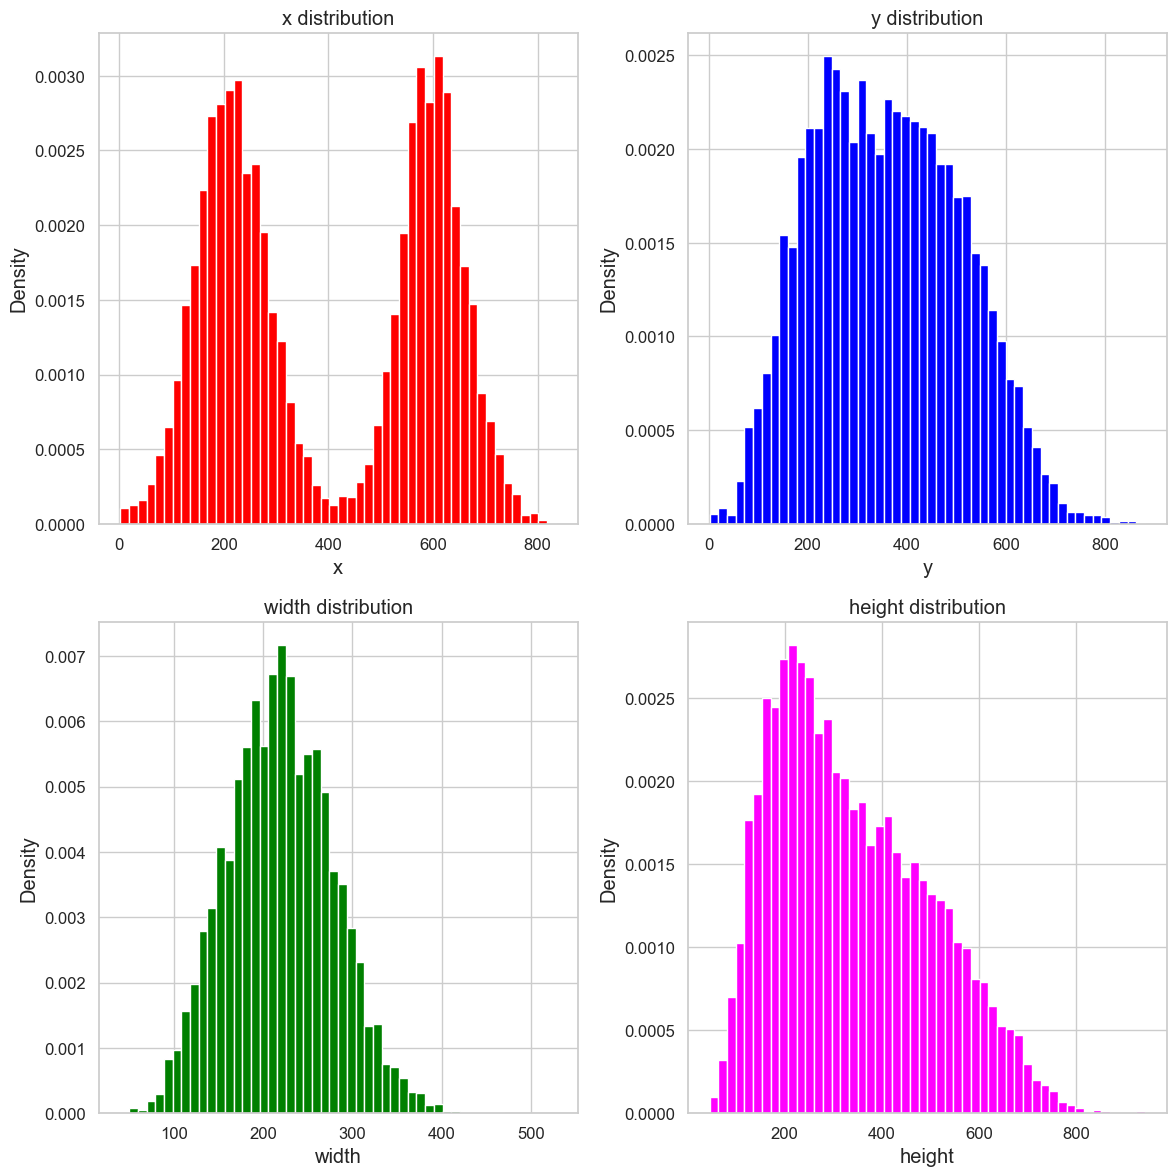

In [12]:
# Filter data for 'Target' == 1
target1 = train_class_df.query("Target == 1")

# Set default styles (optional)
sns.set_theme(style="whitegrid", font_scale=1.2)  # Improved readability

# Create a figure and axes for subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Distribute each feature and adjust plot parameters
ax_mapping = {
    (0, 0): {"column": "x", "color": "red"},
    (0, 1): {"column": "y", "color": "blue"},
    (1, 0): {"column": "width", "color": "green"},
    (1, 1): {"column": "height", "color": "magenta"},
}

for row, col in ax_mapping.keys():
    ax[row, col].hist(target1[ax_mapping[row, col]["column"]], bins=50, density=True, color=ax_mapping[row, col]["color"])
    ax[row, col].set_xlabel(ax_mapping[row, col]["column"])
    ax[row, col].set_ylabel("Density")
    ax[row, col].set_title(f"{ax_mapping[row, col]['column']} distribution")  # Corrected usage of f-string
    ax[row, col].tick_params(axis='both', which='major', labelsize=12)  # Consistent label size

# Show the plot
plt.tight_layout()  # Prevent overlapping elements
plt.show()

As we can see, the distribution of opacity location in images is normality. Also, in most cases, pneumonia has rather small dimensions of 200-300 pixels (20-30% of the picture). An interesting observation is that the upper left graph clearly shows the location of the two lungs, and an almost even distribution for both

In [13]:
image_train_path = os.listdir(TRAIN_IMAGES_PATH)
image_test_path = os.listdir(TEST_IMAGES_PATH)
print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 26684 
Number of images in test set: 3000


So, we have too big train data set. So we have to cut it and select a certain part to reduce the computation time considering the limited computing power and RAM.

In [14]:
tmp = train_class_df.groupby(['patientId','Target', 'class'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target','class']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
df2.columns = ['Exams', 'Target','Class', 'Entries']
df2

Exams  Target                         Class  Entries
0      1       0  No Lung Opacity / Not Normal    11821
1      1       0                        Normal     8851
2      1       1                  Lung Opacity     2614
3      4       1                  Lung Opacity     3266
4      9       1                  Lung Opacity      119
5     16       1                  Lung Opacity       13

We have quite a lot of images with many localizations of pneumonia, this may become a problem in recognition in the future

In [16]:
samplePatientID = list(train_class_df[:1].T.to_dict().values())[0]['patientId']
samplePatientID = samplePatientID + '.dcm'
dicom_file_path = os.path.join(TRAIN_IMAGES_PATH, samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

We have a lot of interesting information, especially how age and gender can affect the model. But unfortunately, we did not use it in the process of work

In [17]:

def show_dicom_images(data):
    """
    Display DICOM images along with associated metadata.

    Parameters:
    - data (DataFrame): Pandas DataFrame containing DICOM image data.
                        It must have columns including 'patientId', 'Target', 'class', 'x', 'y', 'width', and 'height'.

    Returns:
    - None

    This function takes in a DataFrame containing DICOM image data and displays a grid of images along with their associated metadata. 
    It expects the DataFrame to have columns 'patientId', 'Target', 'class', 'x', 'y', 'width', and 'height' to locate the images and display relevant information.
    The function reads DICOM images, extracts metadata such as Modality, PatientAge, and PatientSex, and displays the images with associated metadata in a grid format.
    """

    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))

    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(TRAIN_IMAGES_PATH, patientImage)
        
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)

        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

In [22]:
def show_dicom_images_with_boxes(data):
    """
    Display DICOM images with bounding boxes overlaid.

    Parameters:
    - data: DataFrame, the input data containing information about DICOM images and bounding boxes.

    Returns:
    - None

    This function takes a DataFrame `data` as input, where each row represents a DICOM image along with its associated bounding boxes.
    It displays a grid of DICOM images with bounding boxes overlaid. Each DICOM image is displayed with its associated metadata such as Modality, PatientAge, PatientSex, Target, and Class.
    The function assumes that the DICOM images are stored in a directory specified by the global variable `TRAIN_IMAGES_PATH`.
    """

    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(TRAIN_IMAGES_PATH,patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)

        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        
        rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="yellow",alpha = 0.1))   
    plt.show()

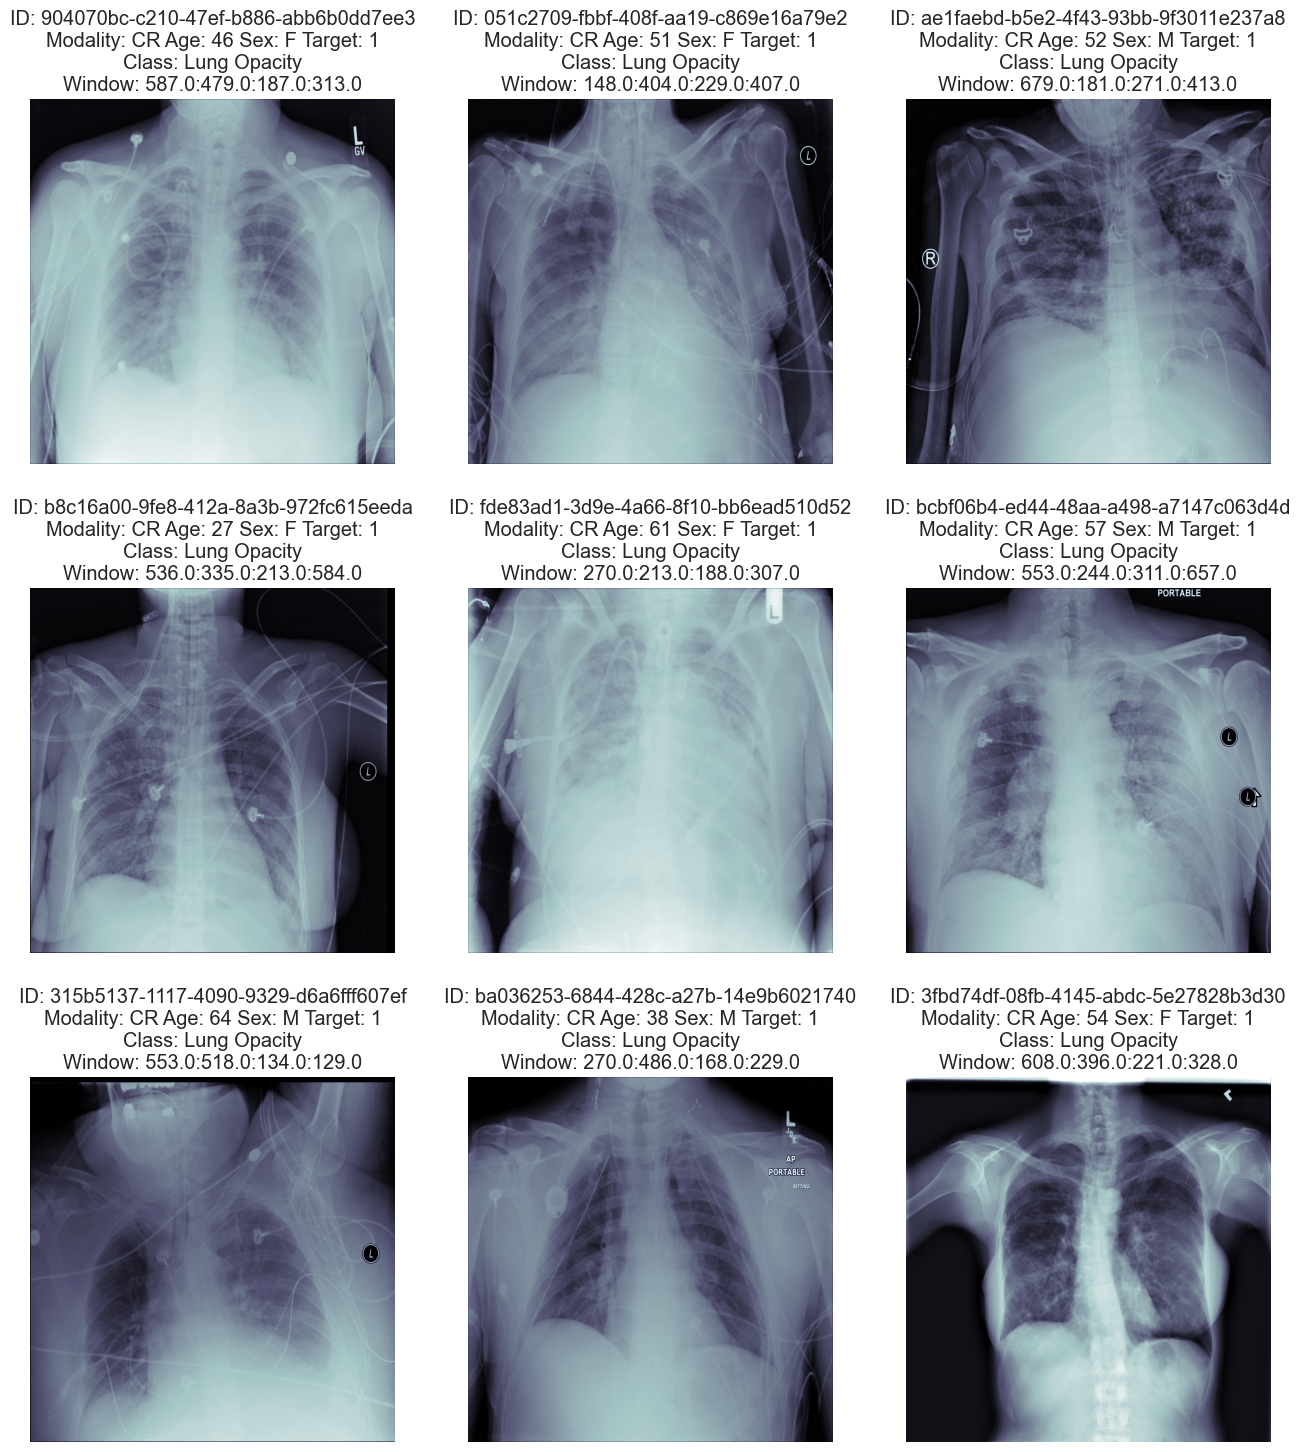

In [19]:
show_dicom_images(train_class_df[train_class_df['Target']==1].sample(9))

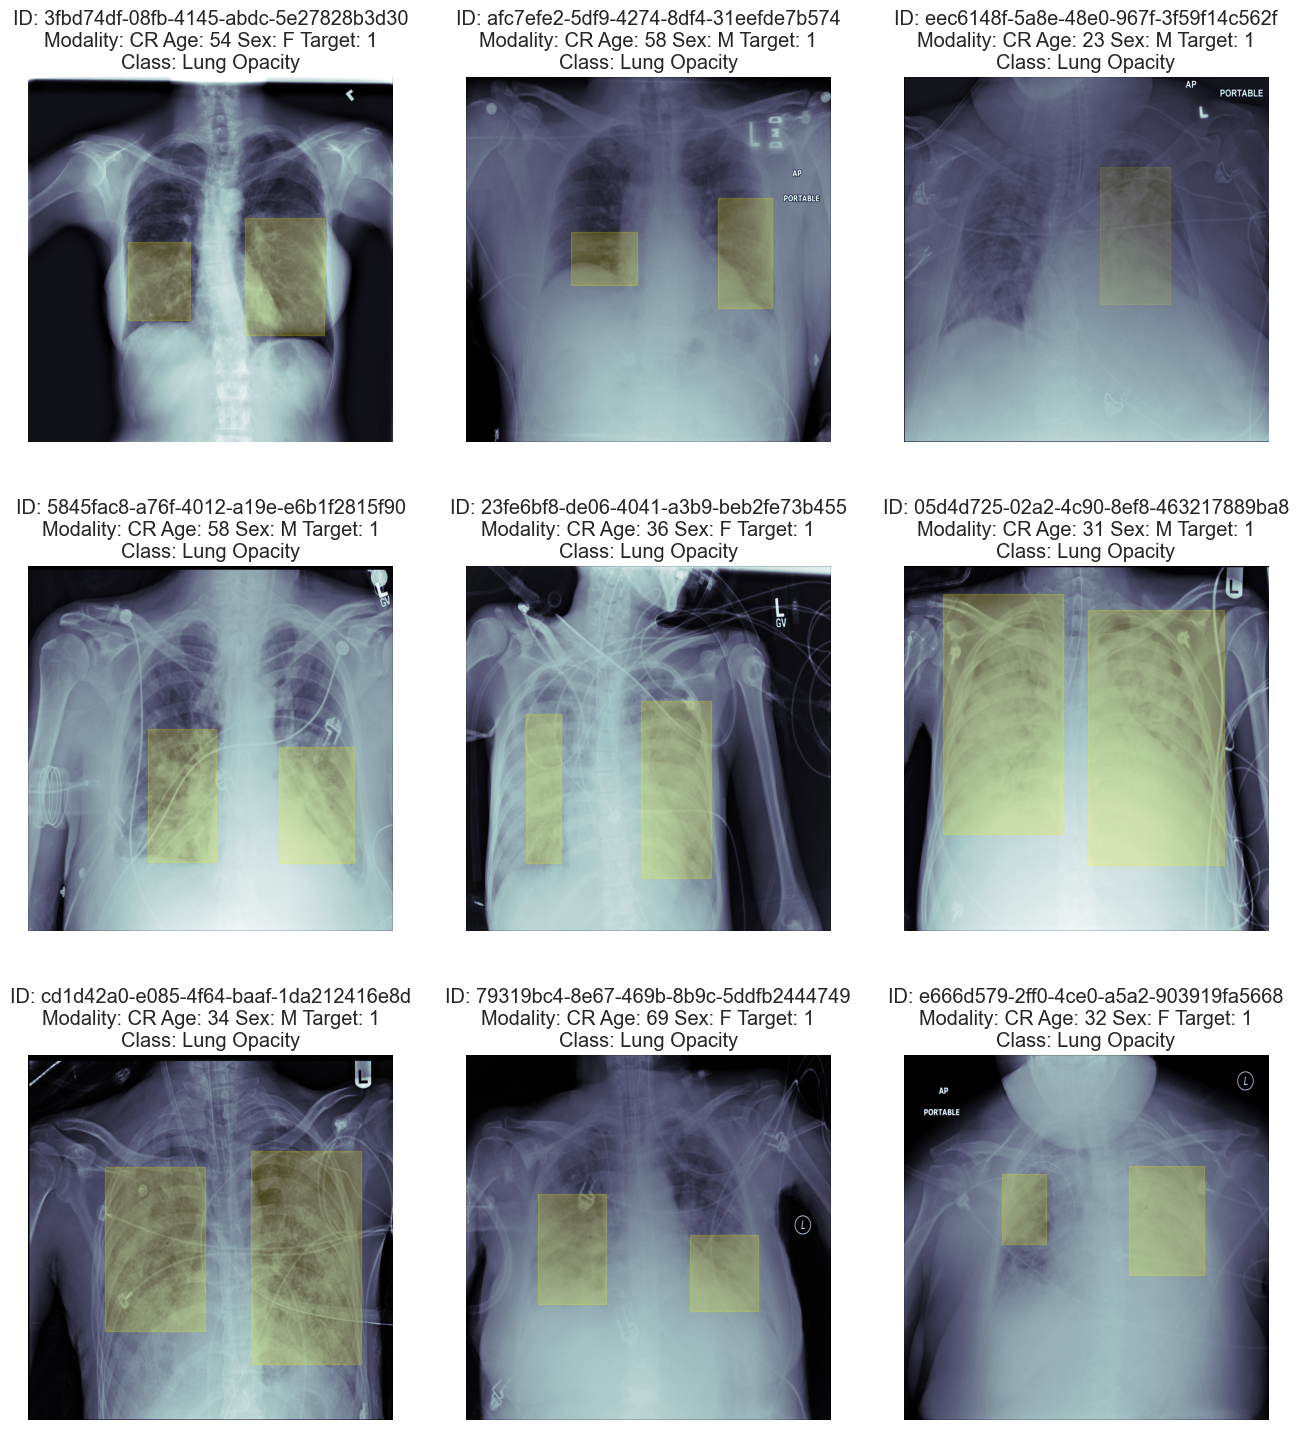

In [23]:
show_dicom_images_with_boxes(train_class_df[train_class_df['Target']==1].sample(9))

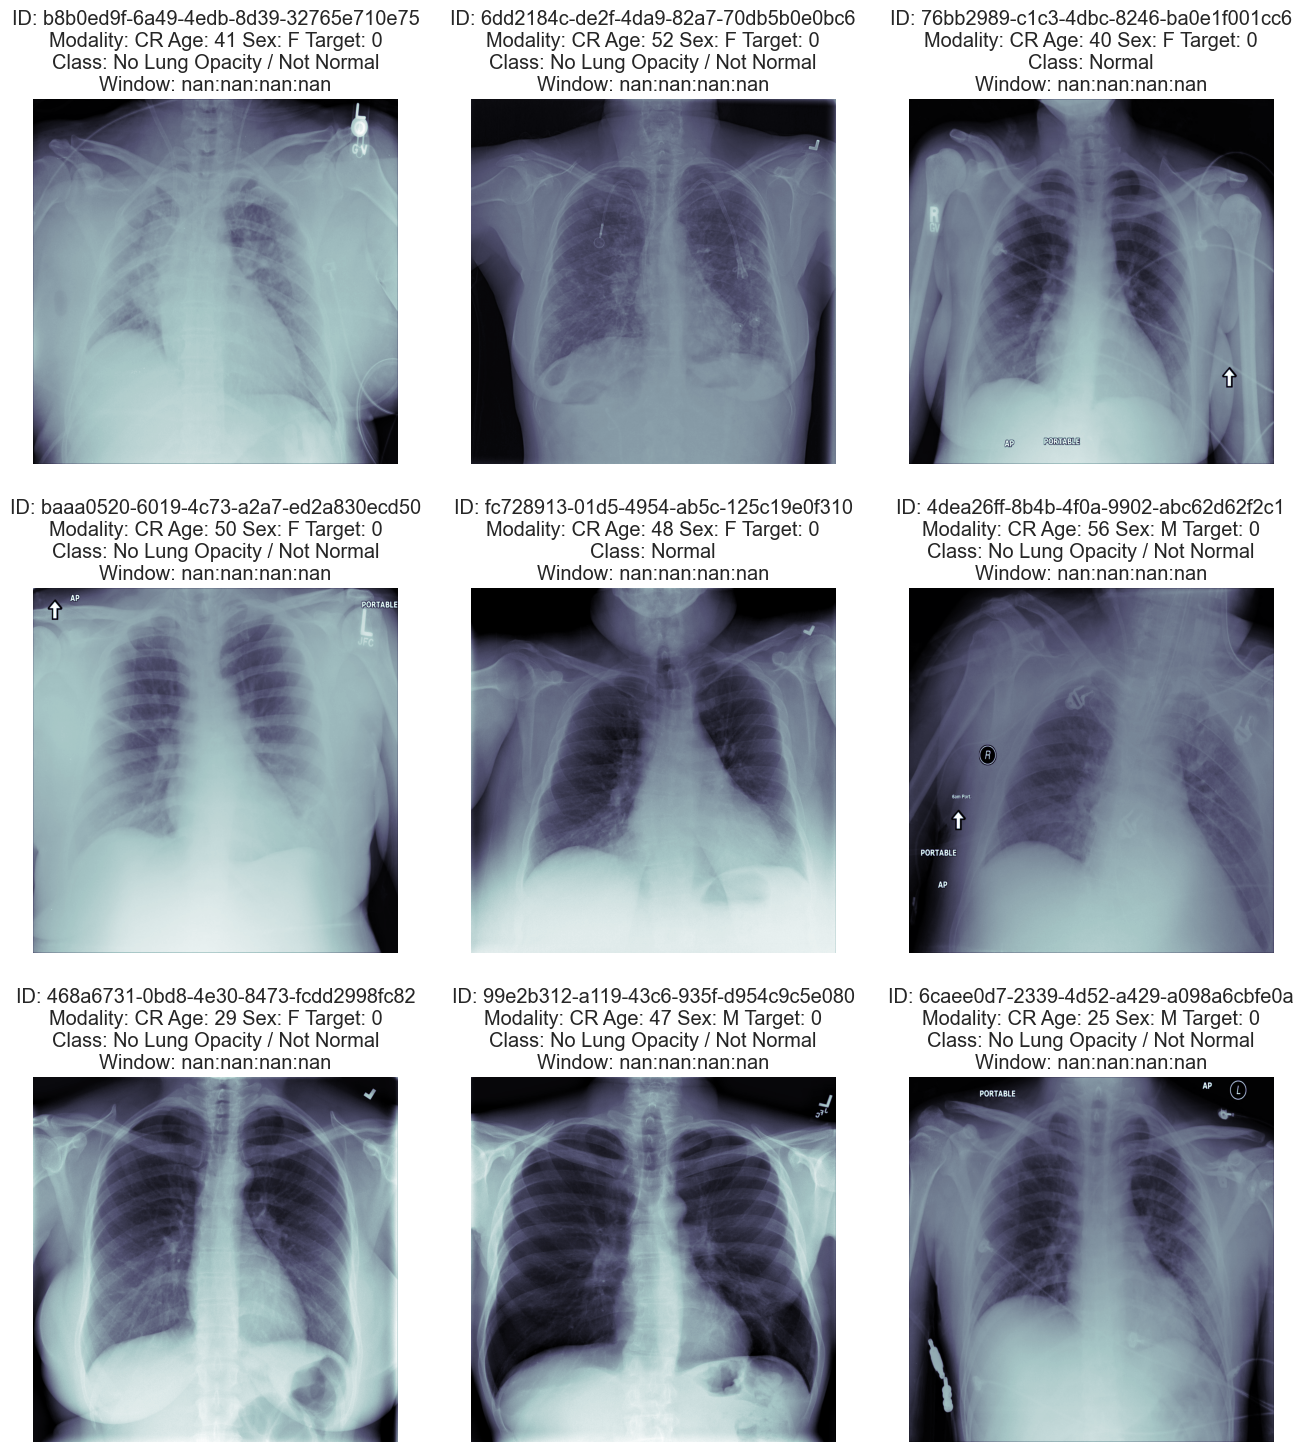

In [24]:
show_dicom_images(train_class_df[train_class_df['Target']==0].sample(9))

As noted, pneumonia is very difficult to see with the naked eye, especially for a person who does not have a specialized education, so it makes sense to use one of the preprocessing